In [1]:
import pandas as pd
bikes = pd.read_pickle('https://github.com/rogovich/Data/blob/master/data/BikesDataVars.pkl?raw=true')

In [3]:
month_temp = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

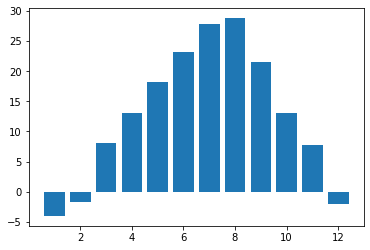

In [9]:
plt.bar(month_temp.index, month_temp)

<BarContainer object of 12 artists>

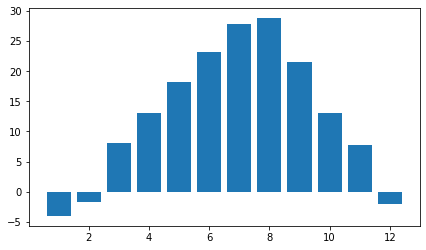

In [31]:
fig, ax = plt.subplots(figsize=(7, 4)) # figure, axes
ax.bar(month_temp.index, month_temp)

In [23]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

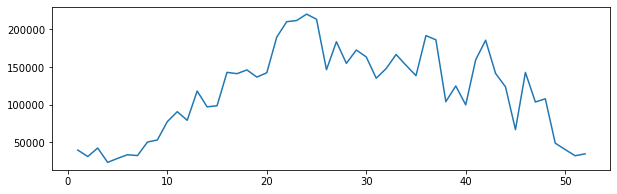

In [39]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(bikes_sum.index, bikes_sum)

In [46]:
bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

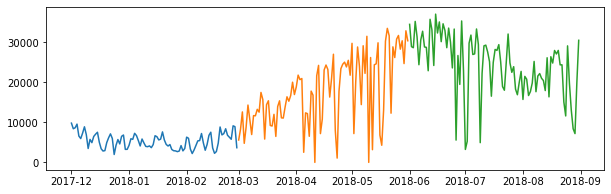

In [51]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()['Winter'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()['Spring'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()['Summer'])
#ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()['Autumn'])

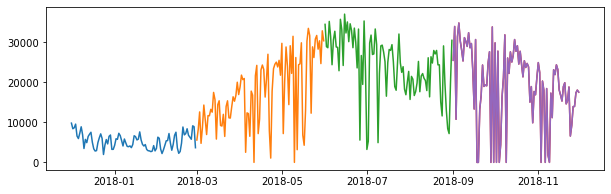

In [53]:
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()['Autumn'])
fig

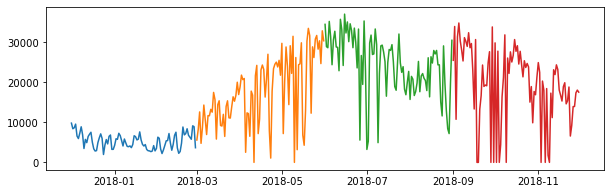

In [50]:
fig, ax = plt.subplots(figsize=(10, 3))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()[season])